# Data Exploration
Author: Jeffreyson Nguyen 862154834

Description: Visualize data collected which includes: average percentage gain from 1-12 weeks from purchase data(SPY vs Congress), Best and worst performing congress member basaed on 1-12 month gain, Highest and lowest Congress member made, Top stocks traded fromm top three congress member, and taking a look at the best performing congress member performancce against SPY by date.

## Code from Data Collecting and Cleaning

In [1]:
import requests
import re
import pandas as pd
import numpy as np

senate_df = pd.read_csv("senatedata.csv")
senate_df = senate_df[['transaction_date', 'ticker', 'asset_type', 'type', 'senator']] #select specific dataframe columns for project
senate_df = senate_df.rename(columns={'transaction_date': 'Date'})
senate_df = senate_df.rename(columns={"senator":"Congress Member"})
senate_df = senate_df.set_index('Date')

senate_df = senate_df.dropna(subset=['ticker', 'type', 'Congress Member']) #remove rows containing NaN cells


#filter out asset types that are stock options
remove_asset = senate_df[senate_df['asset_type'] == 'Stock Option'].index
senate_df.drop(remove_asset, inplace=True)

#filter out asset types that are Municipal Security
remove_asset = senate_df[senate_df['asset_type'] == 'Municipal Security'].index
senate_df.drop(remove_asset, inplace=True)

#filter out asset types that are Other Securities
remove_asset = senate_df[senate_df['asset_type'] == 'Other Securities'].index
senate_df.drop(remove_asset, inplace=True)

#filter out asset types that are Corporate Bond
remove_asset = senate_df[senate_df['asset_type'] == 'Corporate Bond'].index
senate_df.drop(remove_asset, inplace=True)

#filter out asset types that are Non-Public Stock
remove_asset = senate_df[senate_df['asset_type'] == 'Non-Public Stock'].index
senate_df.drop(remove_asset, inplace=True)

#filter out asset types that are Cryptocurrency
remove_asset = senate_df[senate_df['asset_type'] == 'Cryptocurrency'].index
senate_df.drop(remove_asset, inplace=True)

#filter out types that are sales full
remove_asset = senate_df[senate_df['type'] == 'Sale (Full)'].index
senate_df.drop(remove_asset, inplace=True)

#filter out types that are sales partial
remove_asset = senate_df[senate_df['type'] == 'Sale (Partial)'].index
senate_df.drop(remove_asset, inplace=True)

#filter out types that are exchanges
remove_asset = senate_df[senate_df['type'] == 'Exchange'].index
senate_df.drop(remove_asset, inplace=True)

#Removes N/A data
senate_df = senate_df[~senate_df.ticker.str.contains('N/A')]
senate_df = senate_df[~senate_df.ticker.str.contains('--')]
senate_df = senate_df[~senate_df.type.str.contains('N/A')]
senate_df ['asset_type'].fillna('Stock', inplace=True)

house_df = pd.read_csv("housedata.csv")
house_df = house_df[['transaction_date', 'ticker', 'type', 'representative']] #select specific dataframe columns for project
house_df = house_df.rename(columns={'transaction_date': 'Date'})
house_df = house_df.rename(columns={"representative":"Congress Member"})
house_df = house_df.set_index('Date')

house_df = house_df.dropna(subset=['ticker', 'type']) #remove rows containing NaN cells

house_df = house_df[~house_df.type.str.contains('sale_full')]
house_df = house_df[~house_df.type.str.contains('sale_partial')]
house_df = house_df[~house_df.type.str.contains('exchange')]
house_df['asset_type'] = 'Stock'
house_df['type'] = 'Purchase'
house_df = house_df[['ticker', 'asset_type', 'type', 'Congress Member']]

#Removes N/A data
house_df = house_df[~house_df.ticker.str.contains('N/A')]
house_df = house_df[~house_df.ticker.str.contains('--')]
house_df = house_df[~house_df.type.str.contains('N/A')]

house_df.index = pd.to_datetime(house_df.index).strftime('%m/%d/%Y')

spy_df = pd.read_csv("spydata.csv")
spy_df = spy_df[['Date', 'Close/Last']]
spy_df = spy_df.rename(columns={"Close/Last":"SPY Price"})
spy_df['Date'] = pd.to_datetime(spy_df['Date'])
spy_df = spy_df.set_index('Date')

final_df = senate_df.append(house_df)
final_df.index = pd.to_datetime(final_df.index)
final_df = final_df.sort_index()


final_df = final_df.join(spy_df, how='outer')
final_df = final_df.dropna(subset=['ticker', 'asset_type', 'type', 'Congress Member', 'SPY Price']) #remove rows containing NaN cells

spy1week = []
spy2week = []
spy1month = []
spy3month= []

for i in final_df.itertuples():
    try:
        date = getattr(i, 'Index')
        loc = spy_df.index.get_loc(getattr(i, 'Index'))
        
        spy_one_week = spy_df.index[loc + 5]
        spy_two_week = spy_df.index[loc + 10]
        spy_one_month = spy_df.index[loc + 20]
        spy_three_month = spy_df.index[loc + 60]
        
        x1 = spy_df.loc[spy_one_week][0]
        x2 = spy_df.loc[spy_two_week][0]
        x3 = spy_df.loc[spy_one_month][0]
        x4 = spy_df.loc[spy_three_month][0]
        
        spy1week.append(x1)
        spy2week.append(x2)
        spy1month.append(x3)
        spy3month.append(x4)

        
    except Exception:
        spy1week.append("N/A")
        spy2week.append("N/A")
        spy1month.append("N/A")
        spy3month.append("N/A")
        pass
    
    
spy_one_week_df = pd.DataFrame({'SPY 1 WEEK PRICE':spy1week})
spy_two_week_df = pd.DataFrame({'SPY 2 WEEK PRICE':spy2week})
spy_one_month_df = pd.DataFrame({'SPY 1 MONTH PRICE':spy1month})
spy_three_month_df = pd.DataFrame({'SPY 3 MONTH PRICE':spy3month})

dates = []

for i, j in final_df.iterrows():
    dates.append(i)
    
spy_one_week_df['Date'] = dates
spy_one_week_df = spy_one_week_df.set_index('Date')

spy_two_week_df['Date'] = dates
spy_two_week_df = spy_two_week_df.set_index('Date')

spy_one_month_df['Date'] = dates
spy_one_month_df = spy_one_month_df.set_index('Date')

spy_three_month_df['Date'] = dates
spy_three_month_df = spy_three_month_df.set_index('Date')

final_df['SPY 1 WEEK PRICE'] = spy_one_week_df
final_df['SPY 2 WEEK PRICE'] = spy_two_week_df
final_df['SPY 1 MONTH PRICE'] = spy_one_month_df
final_df['SPY 3 MONTH PRICE'] = spy_three_month_df

import yfinance as yf
from yahoofinancials import YahooFinancials


#code to store ticker closing price 1 week, 2week, 1 month, and 3 month from purchase date
price = []
price1week = []
price2week = []
price1month = []
price3month = []

og_df = pd.read_csv("og_price.csv")
one_week_df = pd.read_csv("one_week.csv")
two_week_df = pd.read_csv("two_week.csv")
one_month_df = pd.read_csv("one_month.csv")
three_month_df = pd.read_csv("three_month.csv")


one_week_df = one_week_df.rename(columns={'Price': '1 WEEK PRICE'})
two_week_df = two_week_df.rename(columns={'Price': '2 WEEK PRICE'})
one_month_df = one_month_df.rename(columns={'Price': '1 MONTH PRICE'})
three_month_df = three_month_df.rename(columns={'Price': '3 MONTH PRICE'})

dates = []

for i, j in final_df.iterrows():
    dates.append(i)

og_df['Date'] = dates
og_df = og_df.set_index('Date')
one_week_df['Date'] = dates
one_week_df = one_week_df.set_index('Date')
two_week_df['Date'] = dates
two_week_df = two_week_df.set_index('Date')
one_month_df['Date'] = dates
one_month_df = one_month_df.set_index('Date')
three_month_df['Date'] = dates
three_month_df = three_month_df.set_index('Date')

final_df['Purchase Price'] = og_df
final_df['1 WEEK PRICE'] = one_week_df
final_df['2 WEEK PRICE'] = two_week_df
final_df['1 MONTH PRICE'] = one_month_df
final_df['3 MONTH PRICE'] = three_month_df

final_df = final_df.dropna()

spy_1_week_gains = []
spy_2_week_gains = []
spy_1_month_gains = []
spy_3_month_gains = []

ticker_1_week_gains = []
ticker_2_week_gains = []
ticker_1_month_gains = []
ticker_3_month_gains = []

dates = []
for i, j in final_df.iterrows():
    dates.append(i)

for i, j in final_df.iterrows():
    spy_og_price = j['SPY Price']
    spy_1_week_sold = j['SPY 1 WEEK PRICE']
    spy_1_week_gain = (((spy_1_week_sold - spy_og_price) / spy_og_price) * 100)
    spy_1_week_gains.append(spy_1_week_gain)
    
    spy_2_week_sold = j['SPY 2 WEEK PRICE']
    spy_2_week_gain = (((spy_2_week_sold - spy_og_price) / spy_og_price) * 100)
    spy_2_week_gains.append(spy_2_week_gain)
    
    spy_1_month_sold = j['SPY 1 MONTH PRICE']
    spy_1_month_gain = (((spy_1_month_sold - spy_og_price) / spy_og_price) * 100)
    spy_1_month_gains.append(spy_1_month_gain)
    
    spy_3_month_sold = j['SPY 3 MONTH PRICE']
    spy_3_month_gain = (((spy_3_month_sold - spy_og_price) / spy_og_price) * 100)
    spy_3_month_gains.append(spy_3_month_gain)
    
    ticker_og_price = j['Purchase Price']
    ticker_1_week_sold = j['1 WEEK PRICE']
    ticker_1_week_gain = (((ticker_1_week_sold - ticker_og_price) / ticker_og_price) * 100)
    ticker_1_week_gains.append(ticker_1_week_gain)
    
    ticker_2_week_sold = j['2 WEEK PRICE']
    ticker_2_week_gain = (((ticker_2_week_sold - ticker_og_price) / ticker_og_price) * 100)
    ticker_2_week_gains.append(ticker_2_week_gain)
    
    ticker_1_month_sold = j['1 MONTH PRICE']
    ticker_1_month_gain = (((ticker_1_month_sold - ticker_og_price) / ticker_og_price) * 100)
    ticker_1_month_gains.append(ticker_1_month_gain)
    
    ticker_3_month_sold = j['3 MONTH PRICE']
    ticker_3_month_gain = (((ticker_3_month_sold - ticker_og_price) / ticker_og_price) * 100)
    ticker_3_month_gains.append(ticker_3_month_gain)
    
spy_1_week_gains_df = pd.DataFrame(spy_1_week_gains, columns=['SPY 1 WEEK %'])
spy_2_week_gains_df = pd.DataFrame(spy_2_week_gains, columns=['SPY 2 WEEK %'])
spy_1_month_gains_df = pd.DataFrame(spy_1_month_gains, columns=['SPY 1 MONTH %'])
spy_3_month_gains_df = pd.DataFrame(spy_3_month_gains, columns=['SPY 3 MONTH %'])

ticker_1_week_gains_df = pd.DataFrame(ticker_1_week_gains, columns=['TICKER 1 WEEK %'])
ticker_2_week_gains_df = pd.DataFrame(ticker_2_week_gains, columns=['TICKER 2 WEEK %'])
ticker_1_month_gains_df = pd.DataFrame(ticker_1_month_gains, columns=['TICKER 1 MONTH %'])
ticker_3_month_gains_df = pd.DataFrame(ticker_3_month_gains, columns=['TICKER 3 MONTH %'])


spy_1_week_gains_df['Date'] = dates
spy_1_week_gains_df = spy_1_week_gains_df.set_index('Date')
spy_2_week_gains_df['Date'] = dates
spy_2_week_gains_df = spy_2_week_gains_df.set_index('Date')
spy_1_month_gains_df['Date'] = dates
spy_1_month_gains_df = spy_1_month_gains_df.set_index('Date')
spy_3_month_gains_df['Date'] = dates
spy_3_month_gains_df = spy_3_month_gains_df.set_index('Date')

ticker_1_week_gains_df['Date'] = dates
ticker_1_week_gains_df = ticker_1_week_gains_df.set_index('Date')
ticker_2_week_gains_df['Date'] = dates
ticker_2_week_gains_df = ticker_2_week_gains_df.set_index('Date')
ticker_1_month_gains_df['Date'] = dates
ticker_1_month_gains_df = ticker_1_month_gains_df.set_index('Date')
ticker_3_month_gains_df['Date'] = dates
ticker_3_month_gains_df = ticker_3_month_gains_df.set_index('Date')

final_df['SPY 1 WEEK %'] = spy_1_week_gains_df
final_df['SPY 2 WEEK %'] = spy_2_week_gains_df
final_df['SPY 1 MONTH %'] = spy_1_month_gains_df
final_df['SPY 3 MONTH %'] = spy_3_month_gains_df

final_df['TICKER 1 WEEK %'] = ticker_1_week_gains_df
final_df['TICKER 2 WEEK %'] = ticker_2_week_gains_df
final_df['TICKER 1 MONTH %'] = ticker_1_month_gains_df
final_df['TICKER 3 MONTH %'] = ticker_3_month_gains_df


## Dataframe for Data Visualization

In [2]:
final_df

,ticker,asset_type,type,Congress Member,SPY Price,SPY 1 WEEK PRICE,SPY 2 WEEK PRICE,SPY 1 MONTH PRICE,SPY 3 MONTH PRICE,Purchase Price,...,1 MONTH PRICE,3 MONTH PRICE,SPY 1 WEEK %,SPY 2 WEEK %,SPY 1 MONTH %,SPY 3 MONTH %,TICKER 1 WEEK %,TICKER 2 WEEK %,TICKER 1 MONTH %,TICKER 3 MONTH %
Date,,,,,,,,,,,,,,,,,,,,,
2012-09-13,DD,Stock,Purchase,Thomas R Carper,146.59,143.770,141.510,140.950,135.70,34.467983,...,31.283749,34.421001,-1.923733,-3.465448,-3.847466,-7.428883,-1.749961,-6.247129,-9.238239,-0.136306
2012-12-17,DD,Stock,Purchase,Thomas R Carper,143.77,142.473,141.450,136.370,146.70,35.274593,...,37.686222,37.854164,-0.902135,-1.613689,-5.147110,2.037977,2.139186,4.900604,6.836730,7.312829
2013-03-15,DD,Stock,Purchase,Thomas R Carper,155.83,155.440,152.110,152.290,143.77,37.854164,...,34.128189,38.447910,-0.250273,-2.387217,-2.271706,-7.739203,-3.046444,-6.288086,-9.842973,1.568510
2013-04-29,CG,Stock,Purchase,John Hoeven,159.30,156.170,155.118,156.050,149.70,18.120909,...,17.672190,16.524195,-1.964846,-2.625235,-2.040176,-6.026365,1.718622,-6.651839,-2.476250,-8.811446
2013-06-13,DD,Stock,Purchase,Thomas R Carper,164.21,162.730,165.830,166.115,154.61,39.182953,...,38.967293,44.323570,-0.901285,0.986542,1.160100,-5.846173,-4.213579,-5.709406,-0.550393,13.119525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-21,AMZN,Stock,Purchase,Hon. Nancy Pelosi,414.94,416.580,422.120,416.740,382.33,3203.080078,...,3453.959961,3241.959961,0.395238,1.730371,0.433798,-7.858968,0.624086,-0.158287,7.832457,1.213828
2021-05-21,AAPL,Stock,Purchase,Hon. Nancy Pelosi,414.94,416.580,422.120,416.740,382.33,125.430000,...,132.300003,150.190002,0.395238,1.730371,0.433798,-7.858968,-0.653751,0.374712,5.477161,19.740096
2021-05-24,BABA,Stock,Purchase,Hon. Pete Sessions,419.17,415.520,417.940,417.610,380.36,210.440002,...,211.320007,172.350006,-0.870768,-0.293437,-0.372164,-9.258773,4.295758,2.556550,0.418174,-18.100169


## SPY vs Congress % Gains over 1 week, 2 week, 1 month, and 3 month

In [3]:
from numpy import * # everything 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy
import pylab

final_df = final_df.reset_index()

spy_1_week_total_gain = final_df['SPY 1 WEEK %'].mean()
congress_1_week_total_gain = final_df['TICKER 1 WEEK %'].mean()

spy_2_week_total_gain = final_df['SPY 2 WEEK %'].mean()
congress_2_week_total_gain = final_df['TICKER 2 WEEK %'].mean()

spy_1_month_total_gain = final_df['SPY 1 MONTH %'].mean()
congress_1_month_total_gain = final_df['TICKER 1 MONTH %'].mean()

spy_3_month_total_gain = final_df['SPY 3 MONTH %'].mean()
congress_3_month_total_gain = final_df['TICKER 3 MONTH %'].mean()

data = {'SPY':[spy_1_week_total_gain, spy_2_week_total_gain, spy_1_month_total_gain, spy_3_month_total_gain],
       'Congress':[congress_1_week_total_gain, congress_2_week_total_gain, congress_1_month_total_gain, congress_3_month_total_gain]}

total_gain_df = pd.DataFrame(data, index=['1 Week', '2 Week', '1 Month', '3 Month'])
total_gain_df = total_gain_df.reset_index()
total_gain_df = total_gain_df.rename(columns={'index': 'Time Range'})
total_gain_df = total_gain_df.set_index('Time Range')

print(total_gain_df)

                 SPY  Congress
Time Range                    
1 Week      0.020815  1.569637
2 Week      0.369473  1.701181
1 Month     0.785684  3.616426
3 Month    -1.599360  8.929471


The data shows that Congress beats SPY by a huge margin in each time range from the price of purchase.

1 week: SPY had 0.02% in gains and the average congress members had 1.57% in gains.

2 week: SPY had 0.36% in gains and congress had 1.7% in gains.

1 month: SPY had 0.78% in gains and congress had 3.6% in gains.

3 month: SPY had -1.59% in gains and congress had 8.9% in gains.

Congress made the largest gains in 3 months while SPY largest gain is 1 month from purchase. 

## Visualizing SPY vs Congress % Gains over 1 week, 2 week, 1 month, and 3 month

<AxesSubplot:title={'center':'SPY vs Congress 2012-2021'}, xlabel='Time Range', ylabel='Percent'>

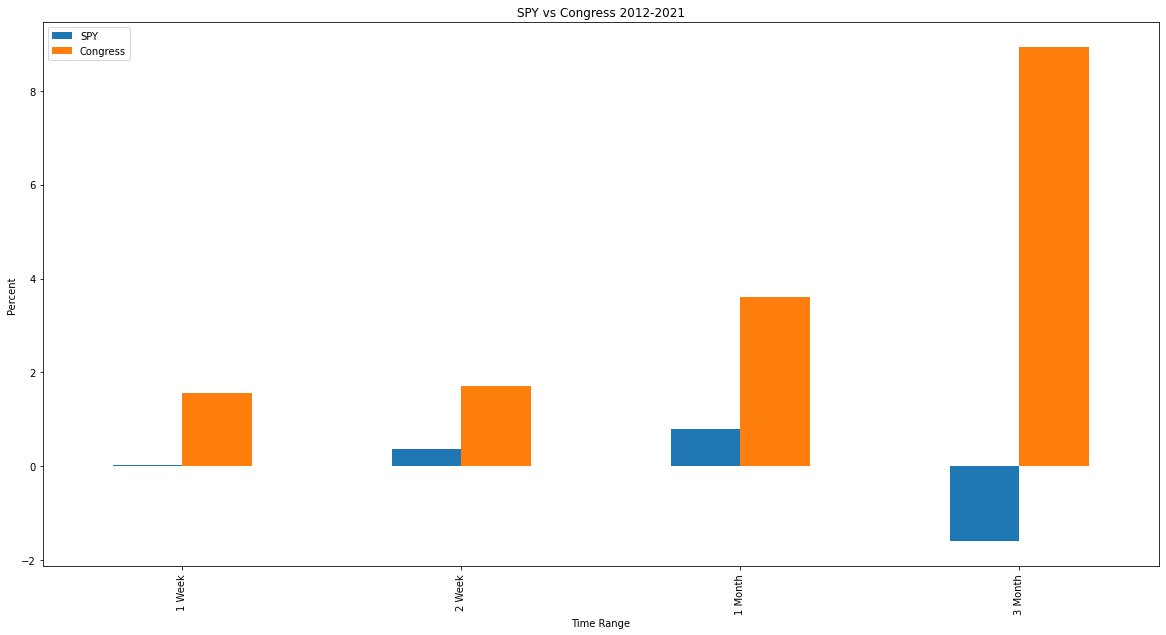

In [4]:
total_gain_df.plot(kind="bar", figsize=(20, 10), ylabel="Percent", title="SPY vs Congress 2012-2021")

## Visualizing SPY vs Congress % Gains over 1 week

Max 1 WEEK % Gain from Congress: 2222.818385540897
Min 1 WEEK % Gain from Congress: -231.0074570781493
Average 1 WEEK % Gain from Congress: 1.5696370380411255


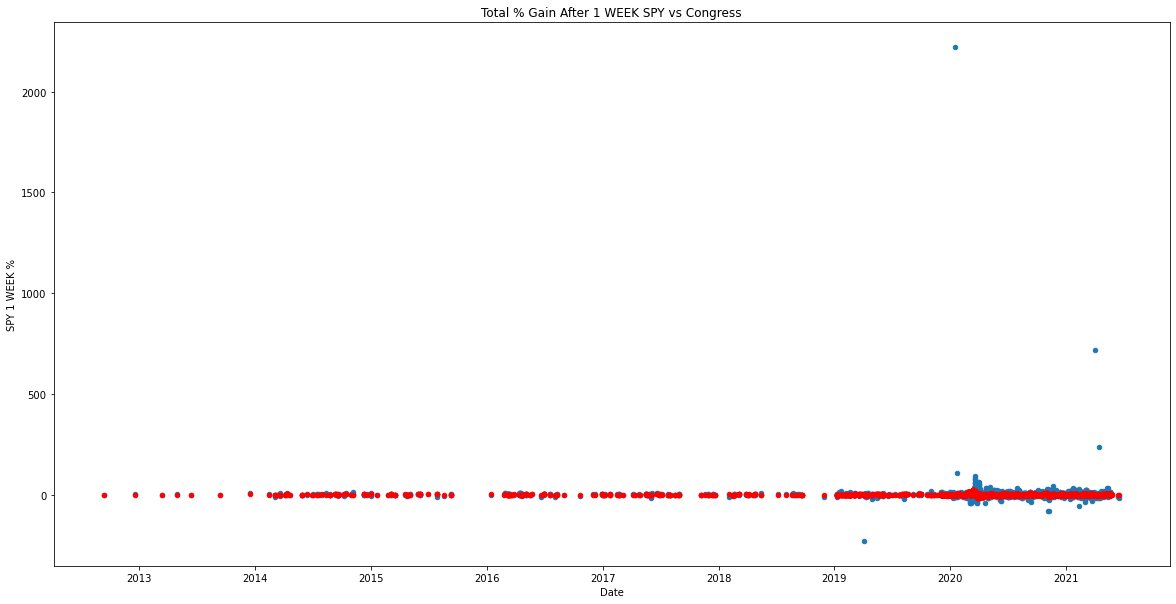

In [5]:
ax = final_df.plot(kind="scatter", x="Date", y="TICKER 1 WEEK %", figsize=(20, 10))
final_df.plot(kind="scatter", x="Date", y="SPY 1 WEEK %", title="Total % Gain After 1 WEEK SPY vs Congress", figsize=(20, 10), secondary_y=True, color='Red', ax=ax)
print("Max 1 WEEK % Gain from Congress:", final_df['TICKER 1 WEEK %'].max())
print("Min 1 WEEK % Gain from Congress:", final_df['TICKER 1 WEEK %'].min())
print("Average 1 WEEK % Gain from Congress:", final_df['TICKER 1 WEEK %'].mean())

## Visualizing SPY vs Congress % Gains over 2 week

Max 2 WEEK % Gain from Congress: 2200.0394447790213
Min 2 WEEK % Gain from Congress: -224.56278936358936
Average 2 WEEK % Gain from Congress: 1.7011806203621171


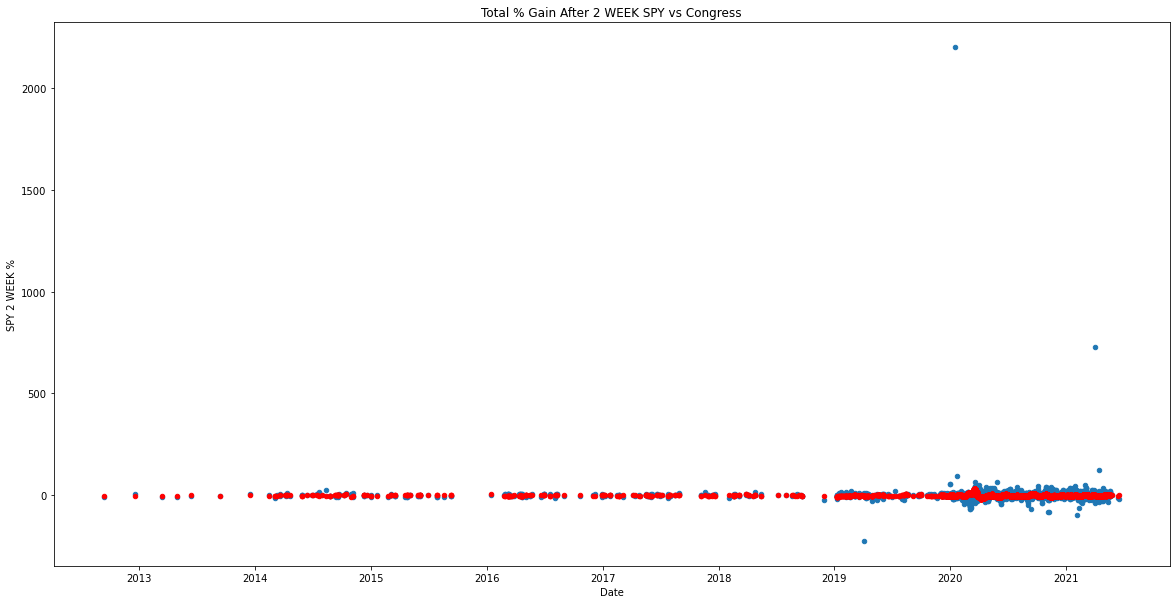

In [6]:
ax = final_df.plot(kind="scatter", x="Date", y="TICKER 2 WEEK %", figsize=(20, 10))
final_df.plot(kind="scatter", x="Date", y="SPY 2 WEEK %", title="Total % Gain After 2 WEEK SPY vs Congress", figsize=(20, 10), secondary_y=True, color='Red', ax=ax)
print("Max 2 WEEK % Gain from Congress:", final_df['TICKER 2 WEEK %'].max())
print("Min 2 WEEK % Gain from Congress:", final_df['TICKER 2 WEEK %'].min())
print("Average 2 WEEK % Gain from Congress:", final_df['TICKER 2 WEEK %'].mean())

## Visualizing SPY vs Congress % Gains over 1 Month

Max 1 MONTH % Gain from Congress: 2193.3544461089987
Min 1 MONTH % Gain from Congress: -226.4704097529194
Average 1 MONTH % Gain from Congress: 3.616426221764427


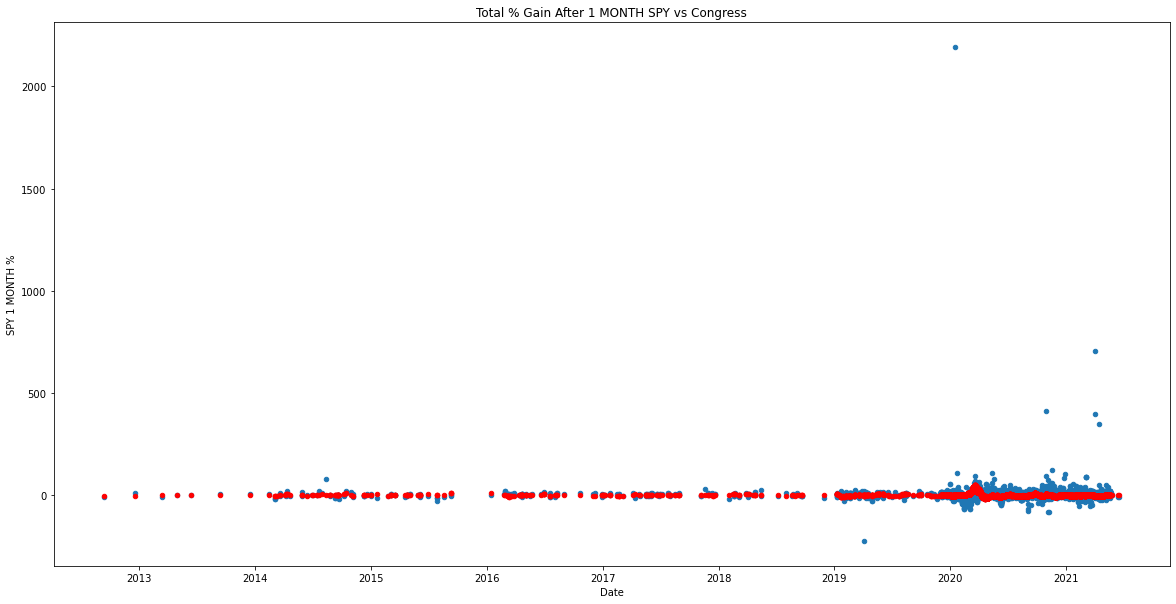

In [7]:
ax = final_df.plot(kind="scatter", x="Date", y="TICKER 1 MONTH %", figsize=(20, 10))
final_df.plot(kind="scatter", x="Date", y="SPY 1 MONTH %", title="Total % Gain After 1 MONTH SPY vs Congress", figsize=(20, 10), secondary_y=True, color='Red', ax=ax)
print("Max 1 MONTH % Gain from Congress:", final_df['TICKER 1 MONTH %'].max())
print("Min 1 MONTH % Gain from Congress:", final_df['TICKER 1 MONTH %'].min())
print("Average 1 MONTH % Gain from Congress:", final_df['TICKER 1 MONTH %'].mean())

## Visualizing SPY vs Congress % Gains over 3 Month

Max 3 MONTH % Gain from Congress: 1633.169351985208
Min 3 MONTH % Gain from Congress: -230.21723241602498
Average 3 MONTH % Gain from Congress: 8.929470607310114


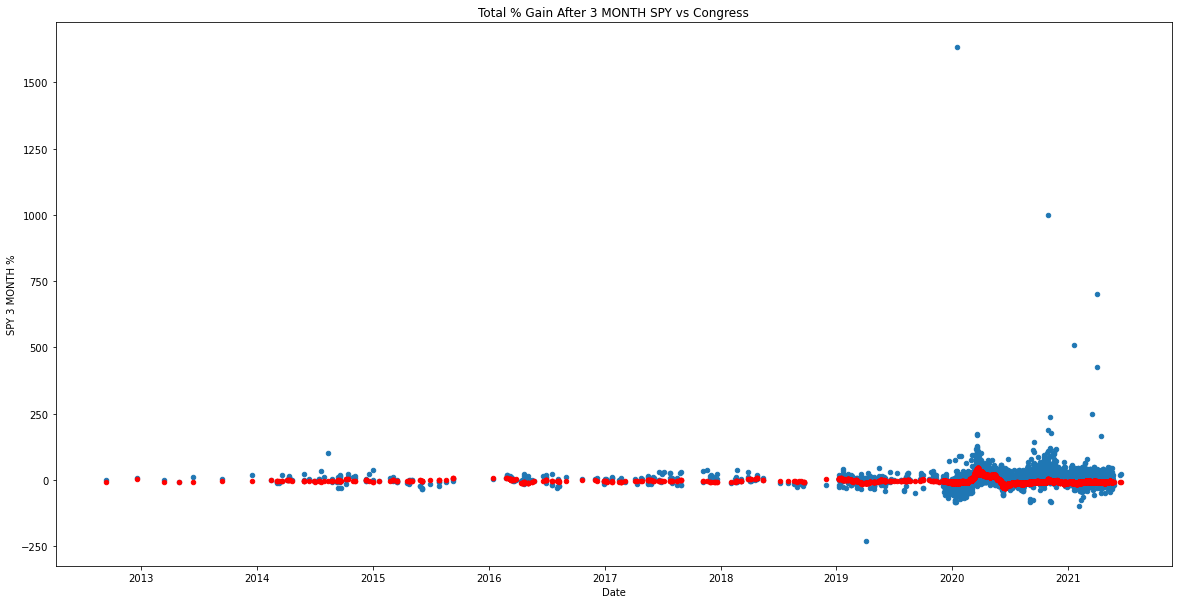

In [8]:
ax = final_df.plot(kind="scatter", x="Date", y="TICKER 3 MONTH %", figsize=(20, 10))
final_df.plot(kind="scatter", x="Date", y="SPY 3 MONTH %", title="Total % Gain After 3 MONTH SPY vs Congress", figsize=(20, 10), secondary_y=True, color='Red', ax=ax)
print("Max 3 MONTH % Gain from Congress:", final_df['TICKER 3 MONTH %'].max())
print("Min 3 MONTH % Gain from Congress:", final_df['TICKER 3 MONTH %'].min())
print("Average 3 MONTH % Gain from Congress:", final_df['TICKER 3 MONTH %'].mean())

## SPY vs Congress Visualization Analysis

According to the visualizations through multiple time period, it shows that Congress makes the largest gains but also the largest loses.

Congress largest gain is 2222% in the 1 week time frame and largest lose is -231% within the 1 week time frame.

The scatter graph also shows that the majority of trades happened between 2019 to 2021. Is is also where the largest gains and lost are for congress. My prediction is that COVID 19 affected the stock market causing the stock market to be volatile.

SPY seem to have the less gains and loses while congress gets higher gains and loses.

SPY also had its largest lost in 2020 of March, due to the COVID-19 pandemic.

## Visualizing Congress Trading Frequency 2012-2021

Hon. Gilbert Cisneros    411
Hon. Josh Gottheimer     291
Hon. Greg Gianforte      288
Hon. Susie Lee           267
Hon. Mark Green          235
                        ... 
Hon. Raúl M. Grijalva      1
Kelly Loeffler             1
William Cassidy            1
Hon. Sara Jacobs           1
None Victoria Spartz       1
Name: Congress Member, Length: 132, dtype: int64

count    132.000000
mean      37.704545
std       67.391727
min        1.000000
25%        3.000000
50%       11.000000
75%       28.500000
max      411.000000
Name: Congress Member, dtype: float64


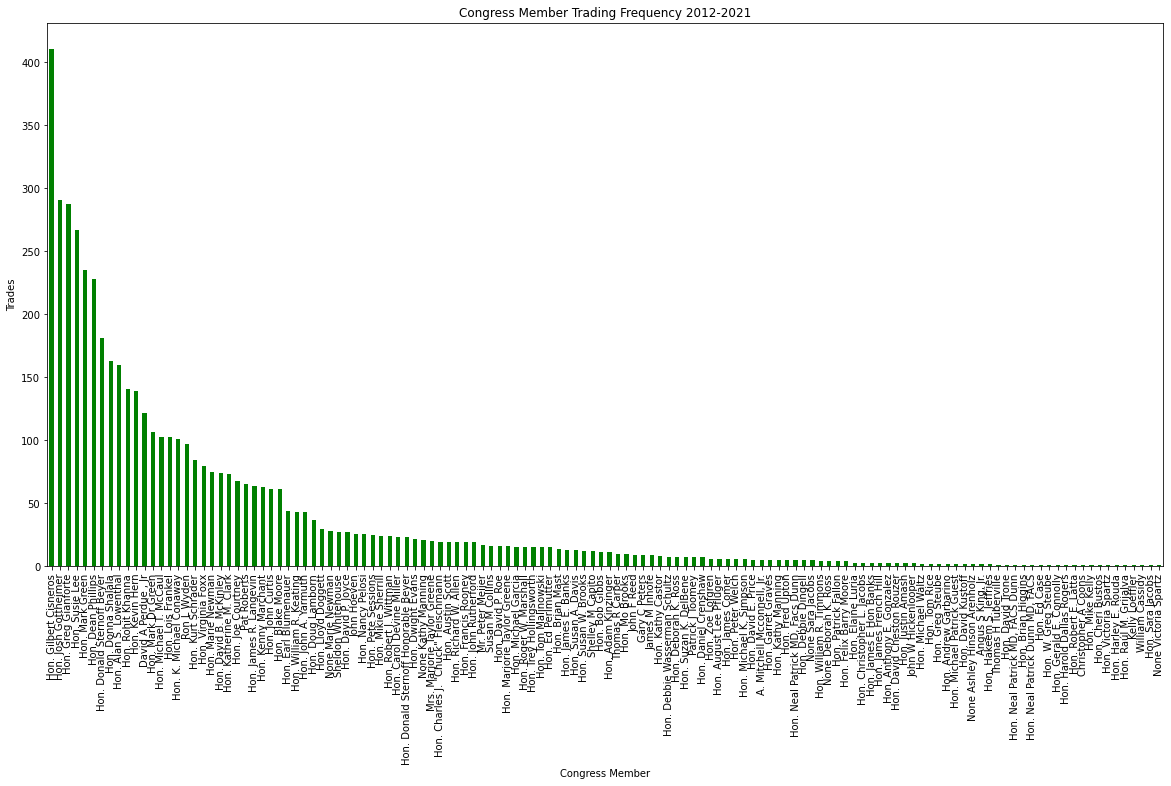

In [9]:
congress_member_count = final_df['Congress Member'].value_counts()
congress_member_count.plot(kind="bar", figsize=(20,10), color='g', title="Congress Member Trading Frequency 2012-2021", ylabel="Trades", xlabel="Congress Member")

print(congress_member_count)
print()
print(congress_member_count.describe())

## Congress Trading Frequency 2012-2021 Analysis

The most active congress member by number of trades is: Hon. Gilbert Cisneros, with 411 trades made.

The least active congress member by number of trades is: Hon. W. Greg Steube, with 1 trade made.

The average trade made by all Congress members is 37 trades.

There are a total of 132 congress members.

## Visualizing Congress Members 1 WEEK Performance 2012-2021

       TICKER 1 WEEK %
count       131.000000
mean          0.704315
std           5.912761
min         -14.906146
25%          -1.315832
50%           0.415104
75%           2.148208
max          31.992911


<AxesSubplot:title={'center':'Congress Member Average 1 Week gain 2012-2021'}, xlabel='Congress Member', ylabel='Percent'>

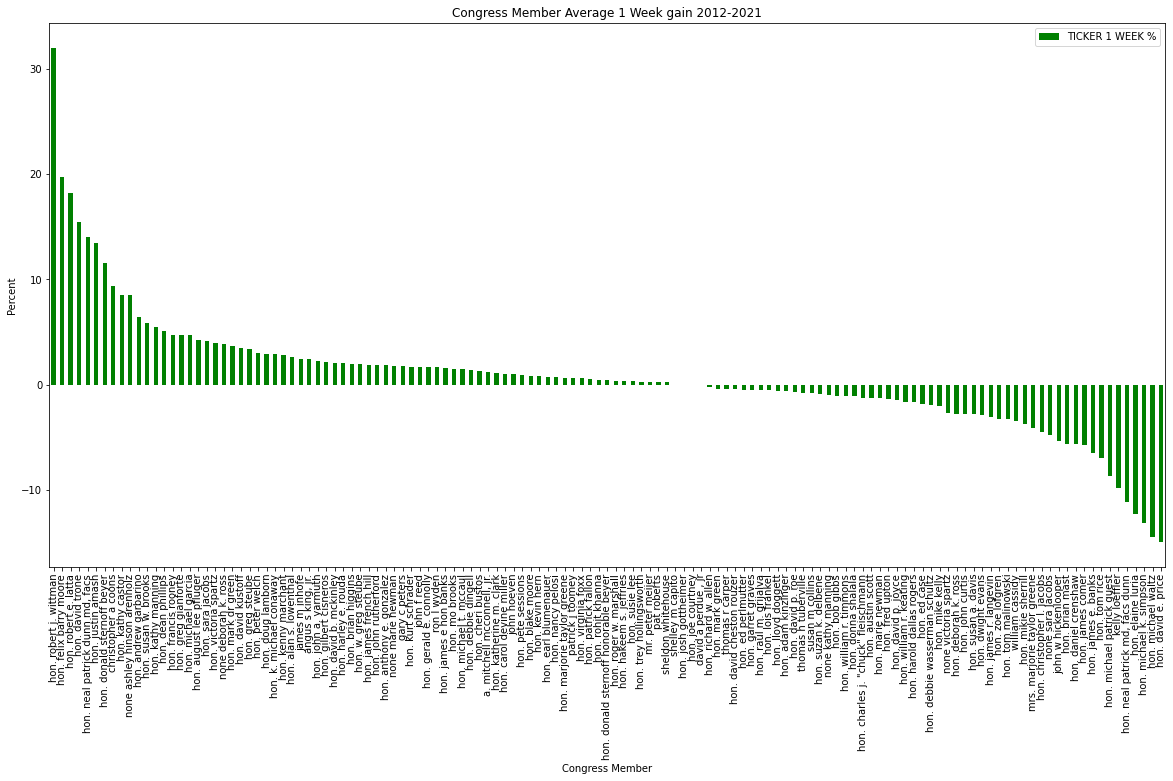

In [10]:
congress_member_avg_gains = final_df.groupby('Congress Member')['TICKER 1 WEEK %'].mean()
def grouper(x):
    return ' '.join(x.lower().split())
congress_member_avg_gains = congress_member_avg_gains.groupby(grouper).sum()
congress_member_avg_gains = pd.DataFrame(congress_member_avg_gains, columns=['TICKER 1 WEEK %'])
congress_member_avg_gains = congress_member_avg_gains.reset_index()
congress_member_avg_gains = congress_member_avg_gains.rename(columns={'index': 'Congress Member'})
congress_member_avg_gains = congress_member_avg_gains.set_index('Congress Member')

congress_member_avg_gains = congress_member_avg_gains.sort_values(['TICKER 1 WEEK %'], ascending=False)

print(congress_member_avg_gains.describe())

congress_member_avg_gains.plot(kind="bar", figsize=(20,10), color='g', title="Congress Member Average 1 Week gain 2012-2021", ylabel="Percent", xlabel="Congress Member")

## Congress Members 1 WEEK Performance 2012-2021 Analysis
Hon. Robert J.Wittman had the best 1 week performance with 32% in gains.

Hon. David E. Price had the worst 1 week performance with -14.9% in loses.

The average percentage is 0.7% in gains.

According to the graph, Hon. Shelley M. Capito, Hon. Joe Courtney, David A. Perdue Jr broke EVEN with 0% gains.

## Visualizing Congress Members 2 WEEK Performance 2012-2021

       TICKER 2 WEEK %
count       131.000000
mean          0.719912
std           5.676380
min         -15.873274
25%          -1.369206
50%           0.704321
75%           2.987705
max          30.270416


<AxesSubplot:title={'center':'Congress Member Average 2 Week gain 2012-2021'}, xlabel='Congress Member', ylabel='Percent'>

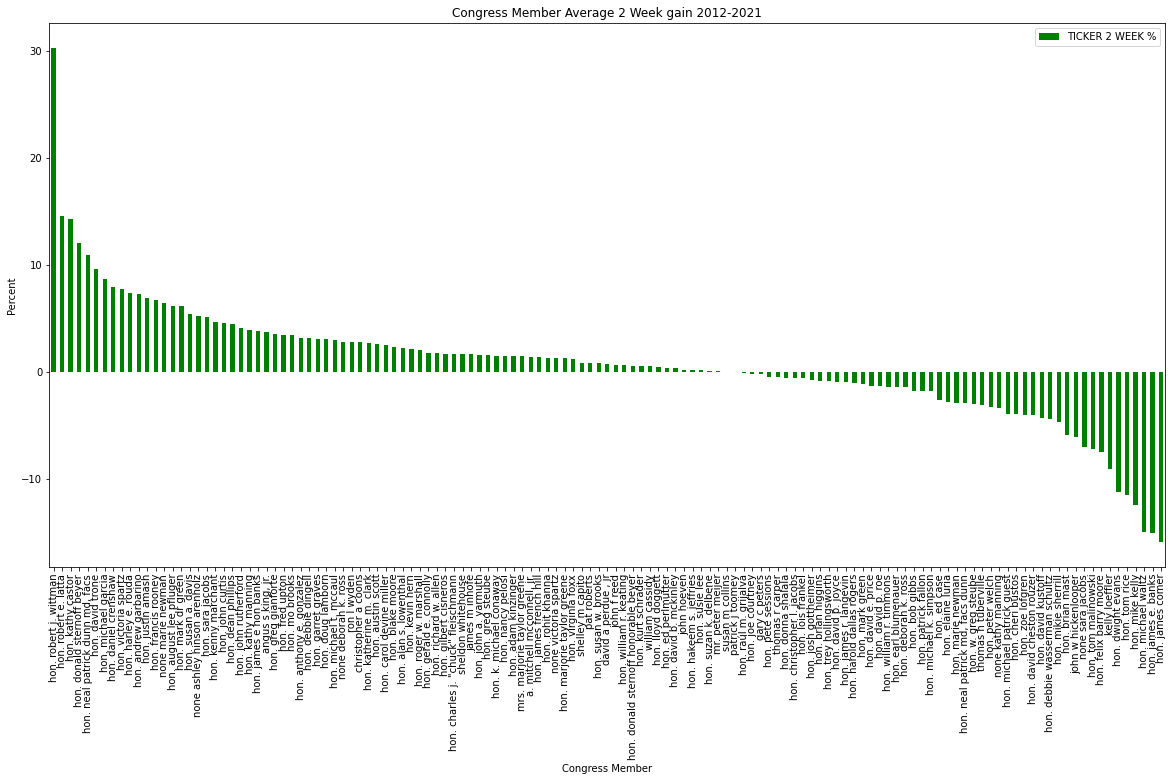

In [11]:
congress_member_avg_gains = final_df.groupby('Congress Member')['TICKER 2 WEEK %'].mean()
def grouper(x):
    return ' '.join(x.lower().split())
congress_member_avg_gains = congress_member_avg_gains.groupby(grouper).sum()
congress_member_avg_gains = pd.DataFrame(congress_member_avg_gains, columns=['TICKER 2 WEEK %'])
congress_member_avg_gains = congress_member_avg_gains.reset_index()
congress_member_avg_gains = congress_member_avg_gains.rename(columns={'index': 'Congress Member'})
congress_member_avg_gains = congress_member_avg_gains.set_index('Congress Member')

congress_member_avg_gains = congress_member_avg_gains.sort_values(['TICKER 2 WEEK %'], ascending=False)
print(congress_member_avg_gains.describe())
congress_member_avg_gains.plot(kind="bar", figsize=(20,10), color='g', title="Congress Member Average 2 Week gain 2012-2021", ylabel="Percent", xlabel="Congress Member")

## Congress Members 2 WEEK Performance 2012-2021 Analysis

Hon. Robert J.Wittman had the best 2 week performance with 30.27% in gains.

Hon. James Comer had the worst 2 week performance with -15.87% in loses.

The average percentage is 0.71% in gains.

## Visualizing Congress Members 1 Month Performance 2012-2021

       TICKER 1 MONTH %
count        131.000000
mean           2.512551
std            8.913582
min          -29.860163
25%           -0.704621
50%            2.239645
75%            6.295641
max           31.300346


<AxesSubplot:title={'center':'Congress Member Average 1 Month gain 2012-2021'}, xlabel='Congress Member', ylabel='Percent'>

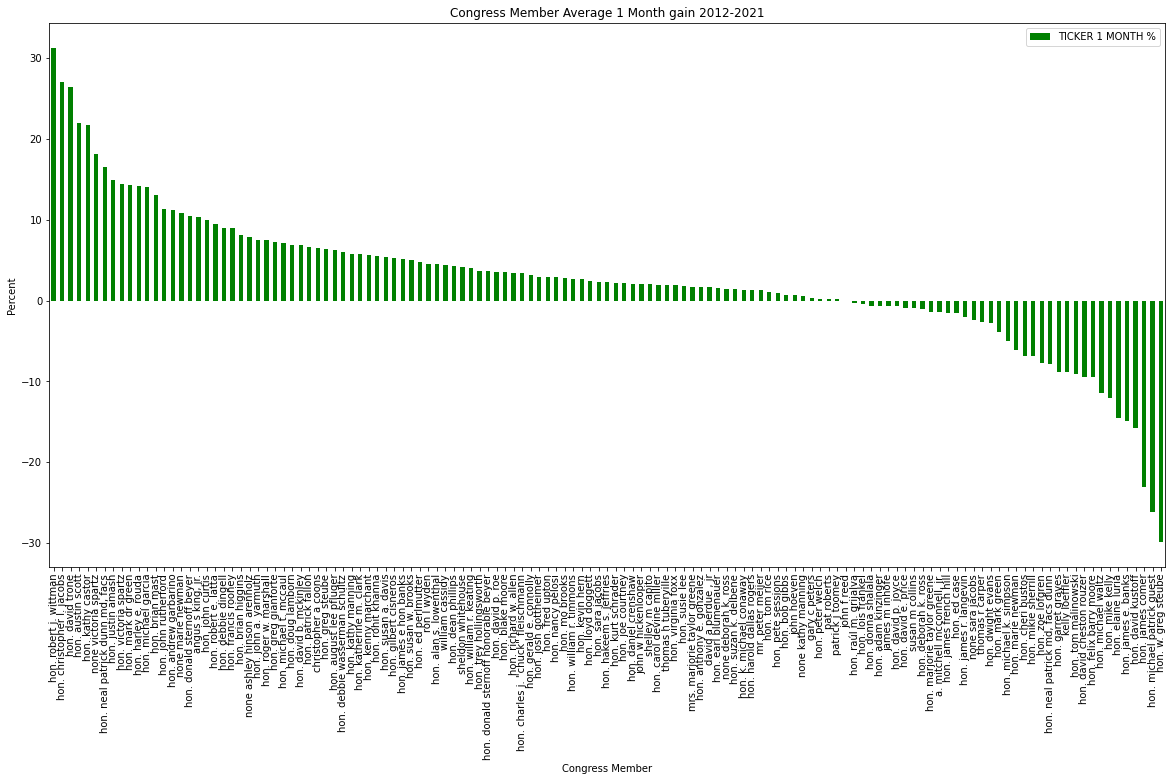

In [12]:
congress_member_avg_gains = final_df.groupby('Congress Member')['TICKER 1 MONTH %'].mean()
def grouper(x):
    return ' '.join(x.lower().split())
congress_member_avg_gains = congress_member_avg_gains.groupby(grouper).sum()
congress_member_avg_gains = pd.DataFrame(congress_member_avg_gains, columns=['TICKER 1 MONTH %'])
congress_member_avg_gains = congress_member_avg_gains.reset_index()
congress_member_avg_gains = congress_member_avg_gains.rename(columns={'index': 'Congress Member'})
congress_member_avg_gains = congress_member_avg_gains.set_index('Congress Member')

congress_member_avg_gains = congress_member_avg_gains.sort_values(['TICKER 1 MONTH %'], ascending=False)
print(congress_member_avg_gains.describe())
congress_member_avg_gains.plot(kind="bar", figsize=(20,10), color='g', title="Congress Member Average 1 Month gain 2012-2021", ylabel="Percent", xlabel="Congress Member")

## Congress Members 1 Month Performance 2012-2021 Analysis

Hon. Robert J.Wittman had the best 1 month performance with 31.3% in gains.

Hon. James Comer had the worst 1 month performance with -29.86% in loses.

The average percentage is 2.51% in gains.

## Visualizing Congress Members 3 Month Performance 2012-2021

       TICKER 3 MONTH %
count        131.000000
mean           6.535409
std           15.830670
min          -61.761507
25%            1.729862
50%            7.059808
75%           13.936442
max           63.949866


<AxesSubplot:title={'center':'Congress Member Average 3 Month gain 2012-2021'}, xlabel='Congress Member', ylabel='Percent'>

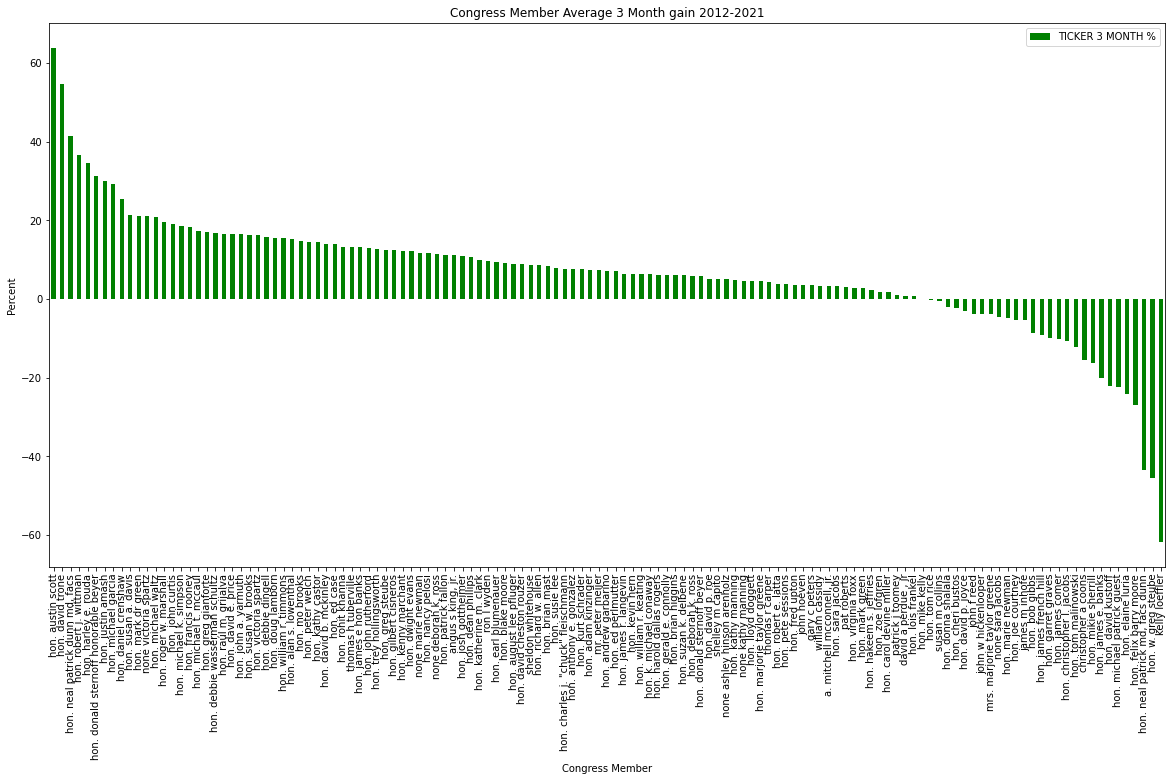

In [13]:
congress_member_avg_gains = final_df.groupby('Congress Member')['TICKER 3 MONTH %'].mean()
def grouper(x):
    return ' '.join(x.lower().split())
congress_member_avg_gains = congress_member_avg_gains.groupby(grouper).sum()
congress_member_avg_gains = pd.DataFrame(congress_member_avg_gains, columns=['TICKER 3 MONTH %'])
congress_member_avg_gains = congress_member_avg_gains.reset_index()
congress_member_avg_gains = congress_member_avg_gains.rename(columns={'index': 'Congress Member'})
congress_member_avg_gains = congress_member_avg_gains.set_index('Congress Member')

congress_member_avg_gains = congress_member_avg_gains.sort_values(['TICKER 3 MONTH %'], ascending=False)
print(congress_member_avg_gains.describe())
congress_member_avg_gains.plot(kind="bar", figsize=(20,10), color='g', title="Congress Member Average 3 Month gain 2012-2021", ylabel="Percent", xlabel="Congress Member")

## Congress Members 3 Month Performance 2012-2021 Analysis

Hon. Austin Scott had the best 3 month performance with 63.94% in gains.

Kelly Loeffler had the worst 3 month performance with -61.76% in loses.

The average percentage is 6.53% in gains.

## Visualizing Top 3 Most Active Congress Members Top 10 Traded Stocks

In [14]:
import matplotlib

top_3_freq = congress_member_count.head(3)
print("Top 3 Congress Member with most trades")
print(top_3_freq)

gilbert = []
josh = []
greg = []

for i, j in final_df.iterrows():
    if j['Congress Member'] == "Hon. Gilbert Cisneros":
        gilbert.append(j['ticker'])
    if j['Congress Member'] == "Hon. Josh Gottheimer":
        josh.append(j['ticker'])
    if j['Congress Member'] == "Hon. Greg Gianforte":
        greg.append(j['ticker'])

Top 3 Congress Member with most trades
Hon. Gilbert Cisneros    411
Hon. Josh Gottheimer     291
Hon. Greg Gianforte      288
Name: Congress Member, dtype: int64


## Hon. Gilbert Cisneros's Top 10 Stocks Traded

Hon. Gilbert Cisneros's most traded stock is between INTU and KMX

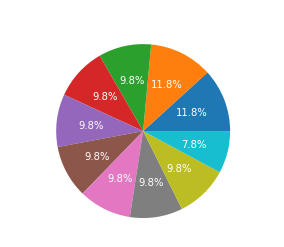

In [15]:
matplotlib.rcParams['text.color'] = 'w'

gilbert_df = pd.DataFrame(gilbert, columns=['Tickers'])
gilbert_df = gilbert_df.value_counts()
gilbert_df = gilbert_df.head(10)
ax = gilbert_df.plot.pie(autopct='%1.1f%%')
ax.set_title("Hon. Gilbert Cisneros's Top 10 Stocks Traded")
pylab.ylabel('')
pylab.show()

## Hon. Josh Gottheimer's Top 10 Stocks Traded

Hon. Josh Gottheimer's most traded stock is MSFT (Microsoft)

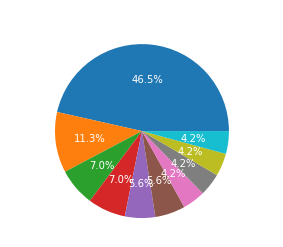

In [16]:
josh_df = pd.DataFrame(josh, columns=['Tickers'])
josh_df = josh_df.value_counts()
josh_df = josh_df.head(10)
ax2 = josh_df.plot.pie(autopct='%1.1f%%')
ax2.set_title("Hon. Josh Gottheimer's Top 10 Stocks Traded")
pylab.ylabel('')
pylab.show()

## Hon. Greg Gianforte's Top 10 Stocks Traded

Hon. Greg Gianforte's most traded stock is AMN

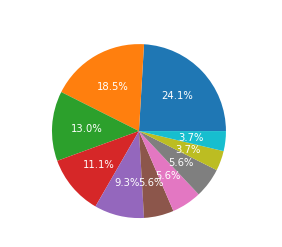

In [17]:
greg_df = pd.DataFrame(greg, columns=['Tickers'])
greg_df = greg_df.value_counts()
greg_df = greg_df.head(10)
ax3 = greg_df.plot.pie(autopct='%1.1f%%')
ax3.set_title("Hon. Greg Gianforte's Top 10 Stocks Traded")
pylab.ylabel('')
pylab.show()

matplotlib.rcParams['text.color'] = 'k'

## Visualizing Congress Member Most Active Trader(Hon. Gilbert Cisneros) vs SPY

In [18]:
gilbert_stats = final_df[final_df['Congress Member'].str.contains('Hon. Gilbert Cisneros')]

gilbert_1_week_best = gilbert_stats['TICKER 1 WEEK %'].max()
gilbert_1_week_worst = gilbert_stats['TICKER 1 WEEK %'].min()



gilbert_graph = gilbert_stats.groupby('Date')['TICKER 1 WEEK %', 'SPY 1 WEEK %'].mean()

<ipython-input-18-ffe5d6d8086c>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gilbert_graph = gilbert_stats.groupby('Date')['TICKER 1 WEEK %', 'SPY 1 WEEK %'].mean()


## Visualizing Hon. Gilbert Cisneros 1 Week Performance vs SPY

<AxesSubplot:title={'center':'Hon. Gilbert Cisneros 1 Week Performance vs SPY 1 Week'}, xlabel='Date', ylabel='Percent'>

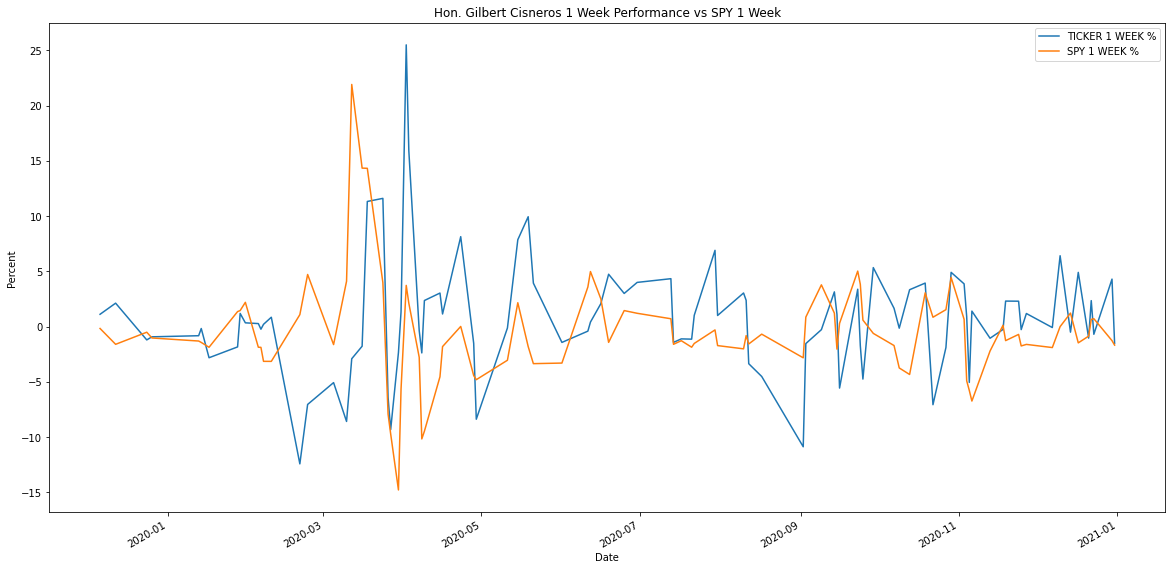

In [19]:
gilbert_graph.plot(kind="line", figsize=(20, 10), title="Hon. Gilbert Cisneros 1 Week Performance vs SPY 1 Week", ylabel="Percent", xlabel="Date")

In [20]:
print("Hon. Gilbert Cisneros's best percentage gain in 1 week:", gilbert_1_week_best)
print("Hon. Gilbert Cisneros's worst percentage gain in 1 week:", gilbert_1_week_worst)

Hon. Gilbert Cisneros's best percentage gain in 1 week: 89.9238691997874
Hon. Gilbert Cisneros's worst percentage gain in 1 week: -21.530010195865376


## Visualizing Hon. Gilbert Cisneros 2 Week Performance vs SPY

<ipython-input-21-1534388cb6eb>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gilbert_graph = gilbert_stats.groupby('Date')['TICKER 2 WEEK %', 'SPY 2 WEEK %'].mean()


<AxesSubplot:title={'center':'Hon. Gilbert Cisneros 2 Week Performance vs SPY 2 Week'}, xlabel='Date', ylabel='Percent'>

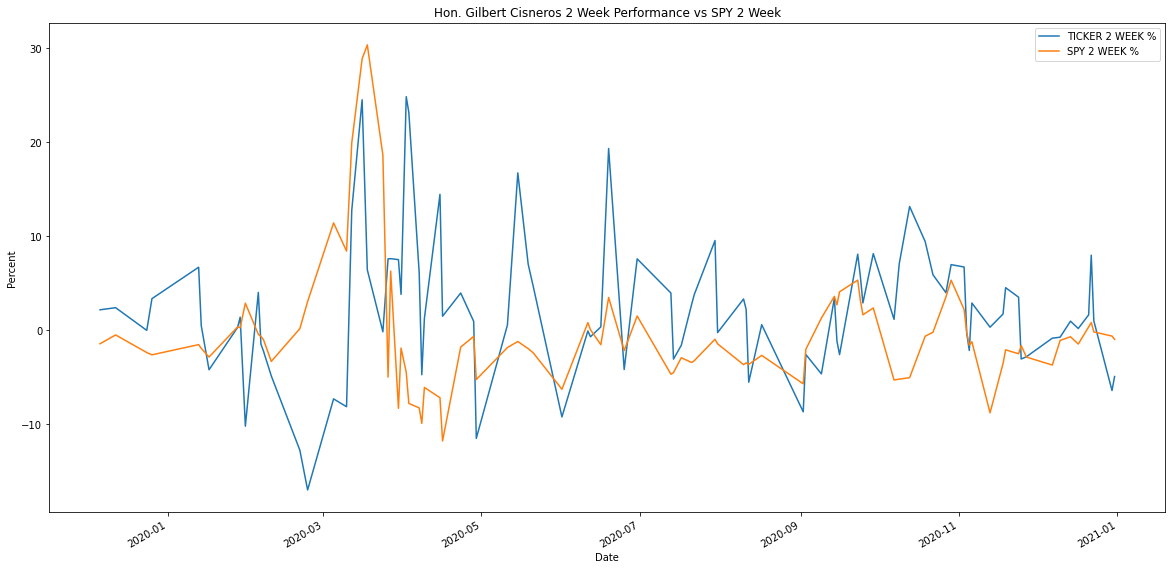

In [21]:
gilbert_2_week_best = gilbert_stats['TICKER 2 WEEK %'].max()
gilbert_2_week_worst = gilbert_stats['TICKER 2 WEEK %'].min()
gilbert_graph = gilbert_stats.groupby('Date')['TICKER 2 WEEK %', 'SPY 2 WEEK %'].mean()
gilbert_graph.plot(kind="line", figsize=(20, 10), title="Hon. Gilbert Cisneros 2 Week Performance vs SPY 2 Week", ylabel="Percent", xlabel="Date")

In [22]:
print("Hon. Gilbert Cisneros's best percentage gain in 2 week:", gilbert_2_week_best)
print("Hon. Gilbert Cisneros's worst percentage gain in 2 week:", gilbert_2_week_worst)

Hon. Gilbert Cisneros's best percentage gain in 2 week: 64.84595316031067
Hon. Gilbert Cisneros's worst percentage gain in 2 week: -32.75165840163999


## Visualizing Hon. Gilbert Cisneros 1 Month Performance vs SPY

In [23]:
gilbert_1_month_best = gilbert_stats['TICKER 1 MONTH %'].max()
gilbert_1_month_worst = gilbert_stats['TICKER 1 MONTH %'].min()

gilbert_graph = gilbert_stats.groupby('Date')['TICKER 1 MONTH %', 'SPY 1 MONTH %'].mean()

<ipython-input-23-27b8bf58351c>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gilbert_graph = gilbert_stats.groupby('Date')['TICKER 1 MONTH %', 'SPY 1 MONTH %'].mean()


<AxesSubplot:title={'center':'Hon. Gilbert Cisneros 1 Month Performance vs SPY 1 Month'}, xlabel='Date', ylabel='Percent'>

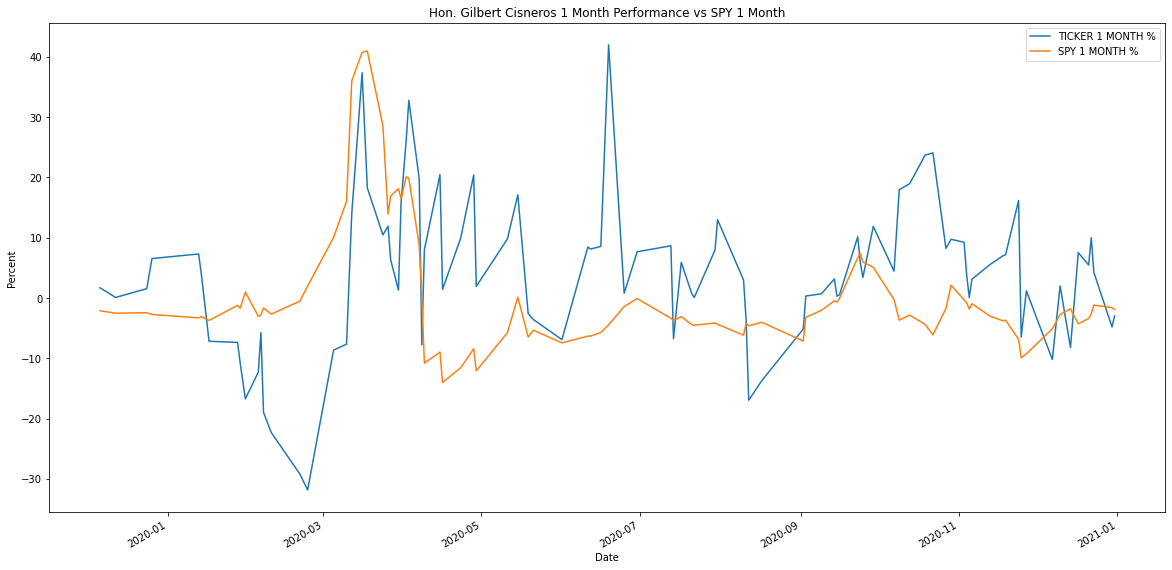

In [24]:
gilbert_graph.plot(kind="line", figsize=(20, 10), title="Hon. Gilbert Cisneros 1 Month Performance vs SPY 1 Month", ylabel="Percent", xlabel="Date")

In [25]:
print("Hon. Gilbert Cisneros's best percentage gain in 1 month:", gilbert_1_month_best)
print("Hon. Gilbert Cisneros's worst percentage gain in 1 month:", gilbert_1_month_worst)

Hon. Gilbert Cisneros's best percentage gain in 1 month: 93.5574314284309
Hon. Gilbert Cisneros's worst percentage gain in 1 month: -55.519940442901586


## Visualizing Hon. Gilbert Cisneros 3 Month Performance vs SPY

In [26]:
gilbert_3_month_best = gilbert_stats['TICKER 3 MONTH %'].max()
gilbert_3_month_worst = gilbert_stats['TICKER 3 MONTH %'].min()

gilbert_graph = gilbert_stats.groupby('Date')['TICKER 3 MONTH %', 'SPY 3 MONTH %'].mean()

<ipython-input-26-0b306971e694>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gilbert_graph = gilbert_stats.groupby('Date')['TICKER 3 MONTH %', 'SPY 3 MONTH %'].mean()


<AxesSubplot:title={'center':'Hon. Gilbert Cisneros 3 Month Performance vs SPY 3 Month'}, xlabel='Date', ylabel='Percent'>

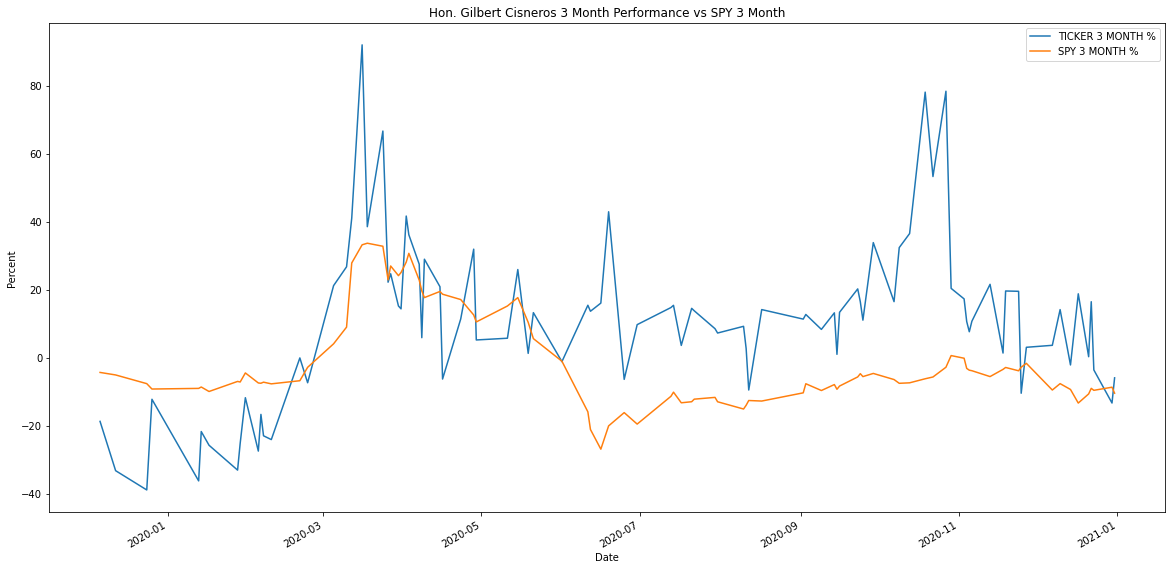

In [27]:
gilbert_graph.plot(kind="line", figsize=(20, 10), title="Hon. Gilbert Cisneros 3 Month Performance vs SPY 3 Month", ylabel="Percent", xlabel="Date")

In [28]:
print("Hon. Gilbert Cisneros's best percentage gain in 3 month:", gilbert_3_month_best)
print("Hon. Gilbert Cisneros's worst percentage gain in 3 month:", gilbert_3_month_worst)

Hon. Gilbert Cisneros's best percentage gain in 3 month: 173.98119352533297
Hon. Gilbert Cisneros's worst percentage gain in 3 month: -67.23136591794415


## Hon. Gilbert Cisneros vs SPY Analysis

From observeration , Hon. Gilbert Cisneros performs the best in the 3 month timeframe, with a gain of 173%. In addition, his worst performance was also within the 3 months time frame with a -67% lose.

According to the graphs above, Hon. Gilbert Cisneros most consistent losses against the spy happened during 2020-03, when the pandemic hit, Hon. Gilbert Cisneros was hit harder than the SPY.

However, in the 3 month graph, Hon. Gilbert Cisneros consistently beat the SPY from 2020-06 to 2020-11, without losing to SPY.

Hon. Gilbert Cisneros consistently beat the SPY in all time frames of 1 week, 2 week, 1 month, and 3 month. 